In [2]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir("/content/drive/My Drive/Dropbox_saiki/kato/Shell model")

Mounted at /content/drive


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import math
import cmath
from numba import njit, f8,i8,c16
import numba
import matplotlib.animation as animation
from IPython.display import HTML
import copy

import sys
sys.path.append('../../lb')
import RungeKutta_acceralated

In [14]:
#パラメーター
nu = 0.001

f = (1 + 1j) * 5 * 0.001

Dimention = 12 #uの次元数
q = 2
k_0 = 2 ** (-4)
k_n = np.zeros((Dimention+4,1))
k_n[2:-2,0] = [k_0 * q ** (i+1) for i in range(Dimention)]
#print(k_n)

c_n_1 = copy.deepcopy(k_n)[2:-2, 0:]
c_n_1[-2:, 0:] = np.zeros((2,1))
#print(c_n_1)

beta = 0.5
c_n_2 = copy.deepcopy(k_n)[1:-3, 0:] * -beta
c_n_2[-1, 0] = np.zeros((1, 1))
#print(c_n_2)

c_n_3 = copy.deepcopy(k_n)[:-4, 0:] * (beta - 1)
#print(c_n_3)

#parameter = [nu,f,k_n,c_n_1,c_n_2,c_n_3]
parameter = {
    'nu' : nu,
    'f' : f,
    'k_n' : k_n,
    'c_n_1' : c_n_1,
    'c_n_2' : c_n_2,
    'c_n_3' : c_n_3
}
#print(parameter)
#print(k_n)

In [ ]:
begin = -6
end = -1
param_step = 500

log_range = np.linspace(begin,end,param_step) #log 10
param=[math.pow(10,i) for i in log_range]

step_number = int((runge_para["period"][1] - runge_para["period"][0]) // runge_para["step"])
param_size = len(param)
#print(step_number)
cascade_tensor = np.zeros((param_size,len(runge_para["start"])+1,step_number+1), dtype = "complex128")

#インスタンス化
model = RungeKutta_acceralated.RungeKutta()

for i, number in enumerate(tqdm(param)):
    
    #nuを更新
    runge_para["nu"] = number
    model.get_arr(**runge_para)
    cascade_tensor[i] = model.arr


100%|█████████████████████████████████████████| 250/250 [00:02<00:00, 86.96it/s]


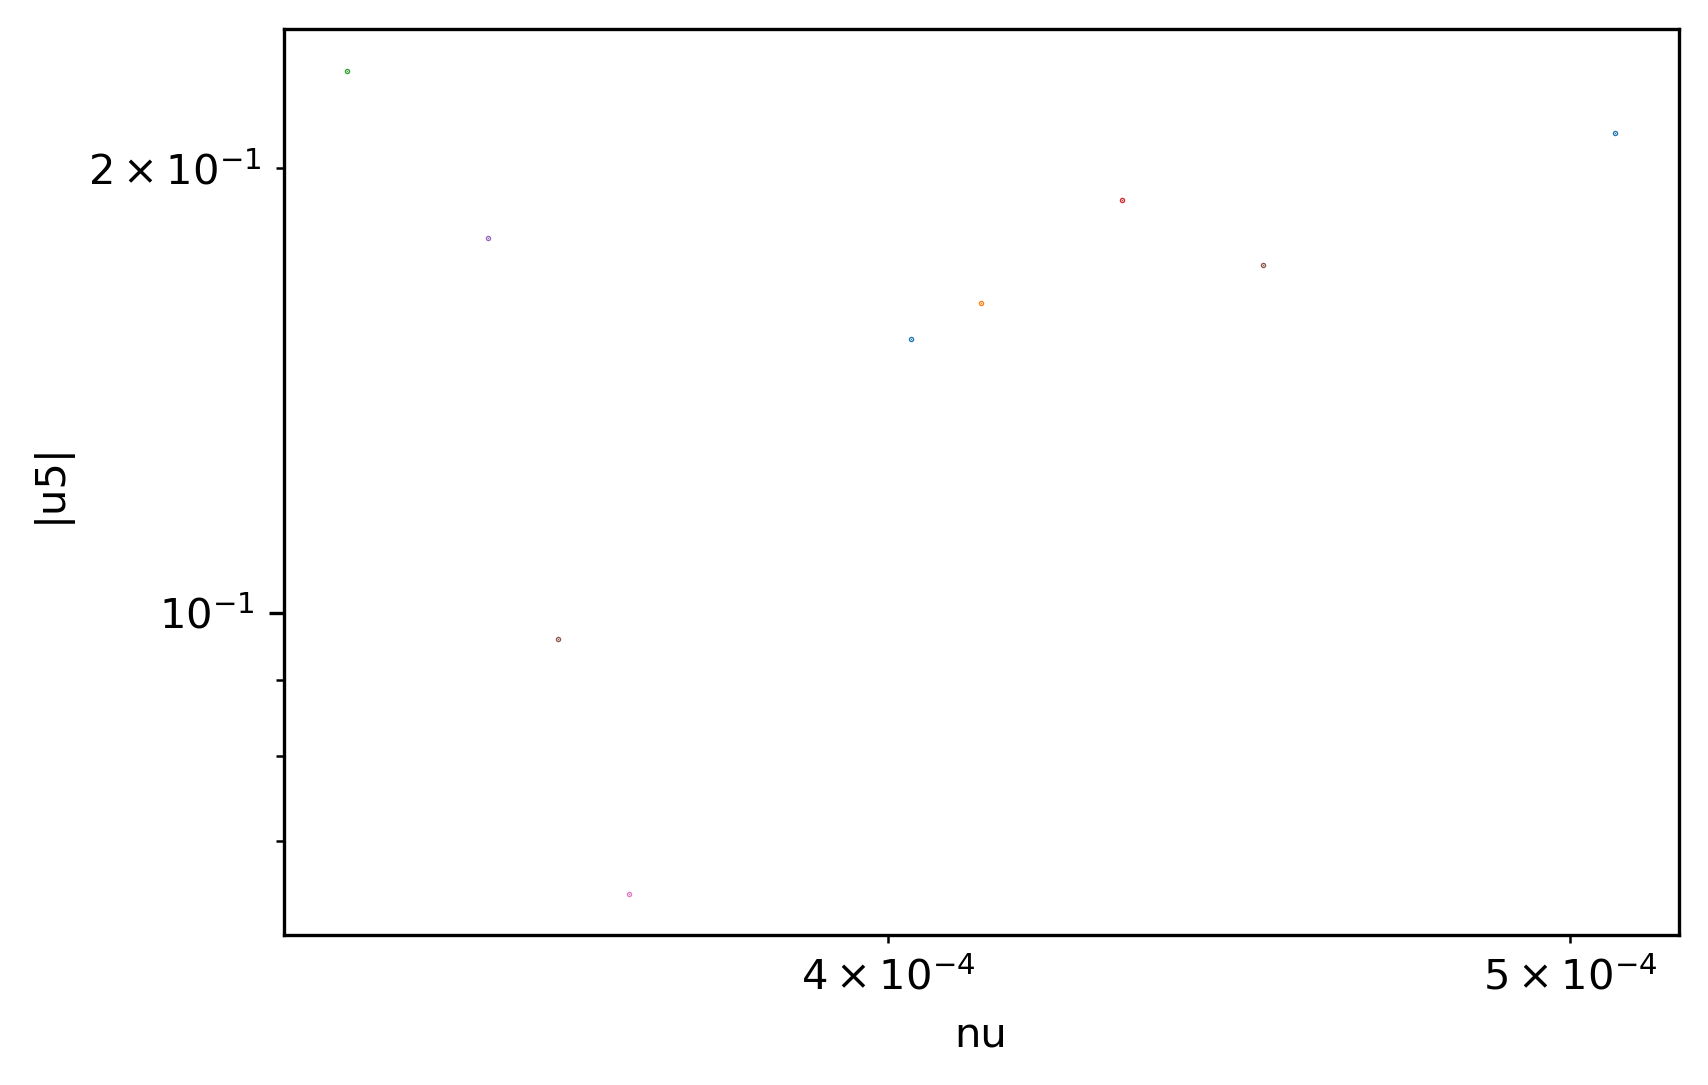

In [ ]:
# u_5(u_4が極大値)を抽出
latter_candidates = [100]
for latter in latter_candidates:
    kaishi = step_number // latter
    plt.figure(dpi=300)
    #plt.title(f"dimention:{len(cascade_tensor[0,:-1,0])} \n step:{runge_para['step']} \n period:{runge_para['period']} \n param_step:{len(param)} \n latter{round(kaishi/step_number,2)}", y = 0.5, x = 0.9)
    plt.xscale("log")
    plt.yscale("log")
    for i  in tqdm(range(len(param))):
        z_list=[] #u4極大値の時のu5を入れる空のリスト

        for j in range(len(cascade_tensor[0,0,-kaishi:]) - 3):
            #7点とって極大判定
            if (    abs(cascade_tensor[i,3,j-kaishi+1]) - abs(cascade_tensor[i,3,j-kaishi]) > 0
                and abs(cascade_tensor[i,3,j-kaishi+2]) - abs(cascade_tensor[i,3,j-kaishi+1]) > 0
                and abs(cascade_tensor[i,3,j-kaishi+3]) - abs(cascade_tensor[i,3,j-kaishi+2]) > 0
                and abs(cascade_tensor[i,3,j-kaishi+4]) - abs(cascade_tensor[i,3,j-kaishi+3]) < 0
                and abs(cascade_tensor[i,3,j-kaishi+5]) - abs(cascade_tensor[i,3,j-kaishi+4]) < 0
                and abs(cascade_tensor[i,3,j-kaishi+6]) - abs(cascade_tensor[i,3,j-kaishi+5]) < 0):
                z_list.append(abs(cascade_tensor[i,4,j-kaishi+3]))

            """
            #５点とって極大判定
            if (    abs(cascade_tensor[i,3,j-kaishi+1]) - abs(cascade_tensor[i,3,j-kaishi]) > 0
                and abs(cascade_tensor[i,3,j-kaishi+2]) - abs(cascade_tensor[i,3,j-kaishi+1]) > 0
                and abs(cascade_tensor[i,3,j-kaishi+3]) - abs(cascade_tensor[i,3,j-kaishi+2]) < 0
                and abs(cascade_tensor[i,3,j-kaishi+4]) - abs(cascade_tensor[i,3,j-kaishi+3]) < 0):
                z_list.append(abs(cascade_tensor[i,4,j-kaishi+2]))  
            """
            """
            #3点取って極大判定
            if (    abs(cascade_tensor[i,3,j-kaishi+1]) - abs(cascade_tensor[i,3,j-kaishi]) > 0
                and abs(cascade_tensor[i,3,j-kaishi+2]) - abs(cascade_tensor[i,3,j-kaishi+1]) < 0):
                z_list.append(abs(cascade_tensor[i,4,j-kaishi+1]))
            """
        plt.scatter([param[i]]*len(z_list),z_list,s=0.1)
    plt.xlabel("nu")
    plt.ylabel("|u5|")
    plt.savefig(fname=f"nu_pdf/nu({param[0]},{param[-1]})_beta{beta}_{runge_para['step']}_{runge_para['period']}_{len(param)}cut_{Dimention}dim_latter{round(kaishi/step_number,2)}.png")

In [ ]:
cascade_tensor.shape

(500, 17, 300000)


100%|█████████████████████████████████████████| 500/500 [01:40<00:00,  4.96it/s]


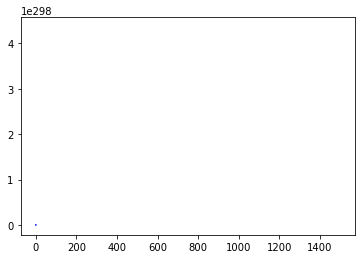

In [ ]:
fig = plt.figure()
ims = []

for i in tqdm(range(500)):
    im = plt.plot(abs(cascade_tensor[i,-1,:]),abs(cascade_tensor[i,3,:]),color="b")
    ims.append(im)
    
anim = animation.ArtistAnimation(fig, ims)
HTML(anim.to_jshtml())